# Выбор семейства распределений в наивном байесе
В этом задании вы сможете немного расслабиться после реализации случайного леса и градиентного бустинга по мотивам материалов прошлой недели. Все, что нужно будет делать — запускать методы из sklearn. Вам предлагается выяснить, какое распределение лучше использовать в наивном байесовском классификаторе в зависимости от вида признаков.

Загрузите датасеты digits и breast_cancer из sklearn.datasets. Выведите несколько строчек из обучающих выборок и посмотрите на признаки. С помощью sklearn.cross_validation.cross_val_score c настройками по умолчанию и вызова метода mean() у возвращаемого этой функцией numpy.ndarray, сравните качество работы наивных байесовских классификаторов на этих двух датасетах. Для сравнения предлагается использовать BernoulliNB, MultinomialNB и GaussianNB. Насколько полученные результаты согласуются с рекомендациями из лекций?

Два датасета, конечно, еще не повод делать далеко идущие выводы, но при желании вы можете продолжить исследование на других выборках (например, из UCI репозитория).

Для сдачи задания, ответьте на приведенные ниже вопросы.

#### Вопрос 1

Каким получилось максимальное качество классификации на датасете breast_cancer?

#### Вопрос 2

Каким получилось максимальное качество классификации на датасете digits?

#### Вопрос 3

Выберите верные утверждения и запишите их номера через пробел (в порядке возрастания номера):

  1. ~~На вещественных признаках лучше всего сработал наивный байесовский классификатор с распределением Бернулли~~
  2. ~~На вещественных признаках лучше всего сработал наивный байесовский классификатор с мультиномиальным~~ распределением
  3. Мультиномиальное распределение лучше показало себя на выборке с целыми неотрицательными значениями признаков
  4. На вещественных признаках лучше всего сработало нормальное распределение

In [25]:
%matplotlib inline
from sklearn import datasets, cross_validation, naive_bayes
import seaborn as sns
import pandas as pd

In [3]:
cancer_dataset = datasets.load_breast_cancer()
digits_dataset = datasets.load_digits()

In [8]:
# print cancer_dataset['DESCR']
cancer_X = cancer_dataset['data']
cancer_y = cancer_dataset['target']

In [7]:
# print digits_dataset['DESCR']
digits_X = digits_dataset['data']
digits_y = digits_dataset['target']

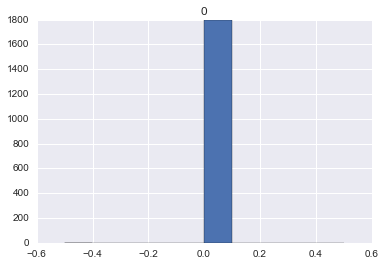

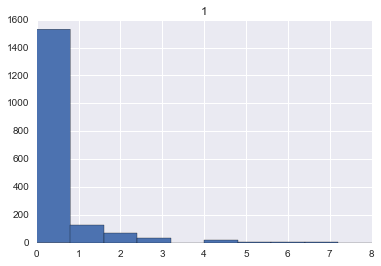

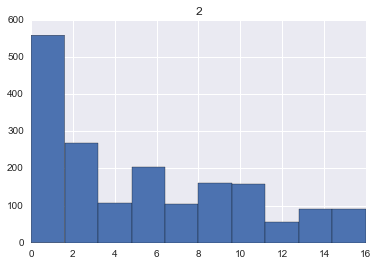

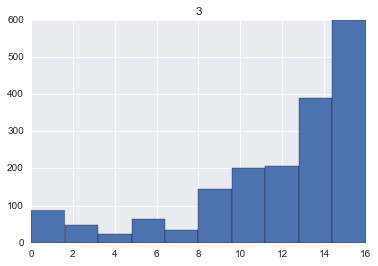

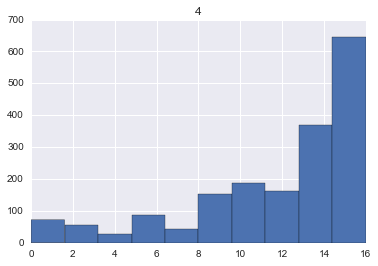

In [23]:
for col in pd.DataFrame(digits_X).columns[:5]:
    pd.DataFrame(digits_X)[[col]].hist()

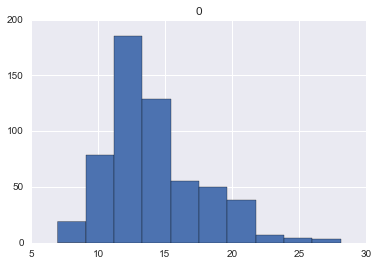

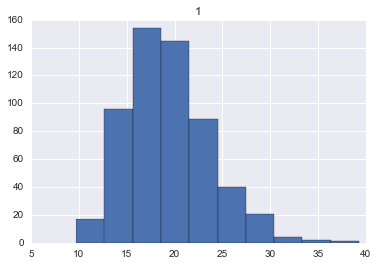

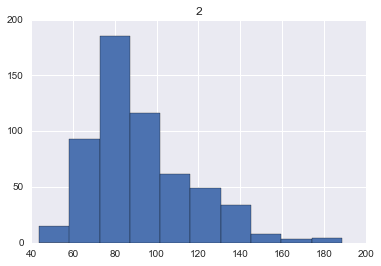

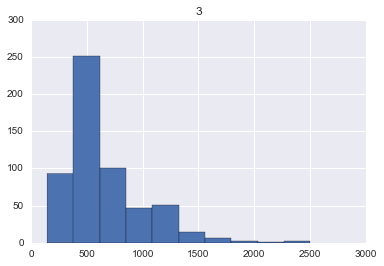

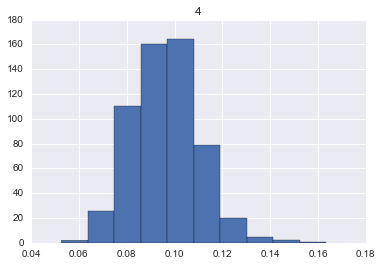

In [24]:
for col in pd.DataFrame(cancer_X).columns[:5]:
    pd.DataFrame(cancer_X)[[col]].hist()

In [26]:
clfs = {
    'bernoulli': naive_bayes.BernoulliNB(),
    'multinomial': naive_bayes.MultinomialNB(),
    'gaussian': naive_bayes.GaussianNB()
}

In [34]:
cancer_scores = {}

for clf_type in clfs:
    cancer_scores[clf_type] = cross_validation.cross_val_score(clfs[clf_type], cancer_X, cancer_y).mean()

cancer_scores

{'bernoulli': 0.62742040285899936,
 'gaussian': 0.9367492806089297,
 'multinomial': 0.89457904019307521}

In [30]:
digits_scores = {}

for clf_type in clfs:
    digits_scores[clf_type] = cross_validation.cross_val_score(clfs[clf_type], digits_X, digits_y).mean()

digits_scores

{'bernoulli': 0.82582365077805819,
 'gaussian': 0.81860038035501381,
 'multinomial': 0.87087714897350532}

In [1]:
from sklearn import datasets, cross_validation, naive_bayes
cancer_dataset = datasets.load_breast_cancer()
cancer_X = cancer_dataset['data']
cancer_y = cancer_dataset['target']
clf = naive_bayes.GaussianNB()
cross_validation.cross_val_score(clf, cancer_X, cancer_y).mean()

0.9367492806089297